# Convolutional neural network (CNN)<a name="convolutional"></a>
[[go back to the top]](#contents)

For the CNN classifier, we have two options:
- **1D CNN**, which inputs can be obtained by applying the **CNN directly on portions (windows)** of the original sound signal (after downsampling and normalization).
- **2D CNN**, which are based on **time frequency analysis of sounds**, as the **Mel-frequency cepstral coefficients (MFCCs)**.

With the features extracted above, we can evaluate their suitability for each CNN approach.
- **1D CNN:**
    - Spectral Centroid
    - Spectral Bandwith
    - Spectral Flatness
    - Spectral Rollof
- **2D CNN:**
    - Chromagram
    - Mel-Scaled Spectogram
    - Short-time Fourier transform Tempogram

In [ ]:
import os
import pandas as pd
import librosa
import numpy as np
def extract_features(audio_path, sample_rate=22050, duration=4):
    # Load audio and define target sample rate
    signal, sr = librosa.load(audio_path, sr=sample_rate, duration=duration)
    signal = librosa.util.fix_length(signal, size=sample_rate * duration)

    # Extract features
    mel_spec = librosa.feature.melspectrogram(y=signal, sr=sr)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    # Create a dictionary to store the mean value of the features 

    return mel_spec_db

def process_data(base_dir):
    files2d=[]
    for folder in os.listdir(base_dir):
        label_list = []
        features_list = []
        fold_dir = os.path.join(base_dir, folder)
        if os.path.isdir(fold_dir):
            for filename in os.listdir(fold_dir):
                file_path = os.path.join(fold_dir, filename)
                if filename.endswith('.wav'):
                    label = filename
                    features = extract_features(file_path).astype(float)
                    features_list.append(features)
                    label_list.append(label)

        # Create DataFrame for each folder
        df = pd.DataFrame(dtype=float)
        df['melspectogram']=features_list
        df['Label'] = label_list
        if 'Label' in df.columns:
            # Extract the classID from each filename
            df['Label'] = df['Label'].apply(lambda x: int(x.split('-')[1]) if isinstance(x, str) and len(x.split('-')) > 1 else None)
            print(f"Updated 'Label' column to 'classID' values.")
        
        files2d.append(df)
    return files2d





base_dir ='/home/luskas/Desktop/universidade/UrbanSound8K/audio'
files2d=process_data(base_dir)


Updated 'Label' column to 'classID' values.
Updated 'Label' column to 'classID' values.
Updated 'Label' column to 'classID' values.
Updated 'Label' column to 'classID' values.
Updated 'Label' column to 'classID' values.
Updated 'Label' column to 'classID' values.
Updated 'Label' column to 'classID' values.
Updated 'Label' column to 'classID' values.
Updated 'Label' column to 'classID' values.
Updated 'Label' column to 'classID' values.
Updated 'Label' column to 'classID' values.


In [19]:
def dif_shape(df, rep, shape):
    list = []
    for i in range(len(df)):
        m = df.loc[i][rep]
        n = np.array(m)
        if(n.shape != shape):
            list.append(i)
    return list

len(dif_shape(files2d[1], 'melspectogram', (40, 173)))

0

In [ ]:

dataframe1=files2d[10]
dataframe1.head()
data = files2d[2]
labels=np.array(data['Label'].tolist())
print(type(data))
print(type(data['Label'].tolist()))
print(data['Label'].tolist())
print(type(labels))
features=np.array(data['melspectogram'].tolist())
melspec=dataframe1['melspectogram'].tolist()
print(melspec[5].shape)


<class 'pandas.core.frame.DataFrame'>
<class 'list'>
[1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 3, 3, 9, 9, 9, 9, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5, 5, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 9, 9, 9, 9, 9, 9, 9, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4

## Hyperparameters

In [32]:
configurations= {
    "num_conv_layers": [3, 4, 5],  # Number of convolutional layers
    "filters_per_layer": [[32, 64], [64, 128], [128, 256], [64, 128, 256], [32, 64, 128, 256]],  # Filters for each layer
    "kernel_size": [3, 5, 7],  # Kernel sizes
    "activation": ["relu"],  # Activation functions
    "dense_units": [64, 128, 256, 512],  # Number of dense layer units
    "dropout": [0.1, 0.2, 0.3,],  # Dropout rates
    "epochs": [20]
}

configurations2d= {
    "num_conv_layers": [3],  # Number of convolutional layers
    "filters_per_layer": [[32, 64],],  # Filters for each layer
    "kernel_size": [3],  # Kernel sizes
    "activation": ["relu"],  # Activation functions
    "dense_units": [64],  # Number of dense layer units
    "dropout": [0.3,],  # Dropout rates
    "epochs": [20]
}

### Random Hyperparameters

In [33]:
import random

def sample_random_config(configurations):
    return {key: random.choice(value) for key, value in configurations.items()}

# Example of a sampled configuration
random_config = sample_random_config(configurations)


### All Possible Hyperparameters

In [34]:
import itertools

def generate_configs(configurations):
    keys, values = zip(*configurations.items())
    return [dict(zip(keys, v)) for v in itertools.product(*values)]

grid_search=generate_configs(configurations)
print(f"Com as opções atuais produz se {len(grid_search)} combinações")


Com as opções atuais produz se 540 combinações


## Model

### 1D Model

In [35]:
from tensorflow.keras import layers, models, optimizers

def build_cnn(config, input_shape):
    model = models.Sequential()
    
    model.add(layers.Input(shape=input_shape))
    
    # First layer: Reshape to match Conv1D input expectations
    model.add(layers.Reshape((input_shape[0], 1)))
    # Add convolutional layers
    for filters in config["filters_per_layer"]:
        model.add(layers.Conv1D(filters, config["kernel_size"], activation=config["activation"], padding="same"))
        model.add(layers.MaxPooling1D(2))
    
    # Add dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(config["dense_units"], activation=config["activation"]))
    model.add(layers.Dropout(config["dropout"]))
    
    # Output layer for classification
    model.add(layers.Dense(10, activation="softmax"))  # Adjust output units for your task
    
    
    return model

#### Model Trainig

In [70]:
import tensorflow as tf
import numpy as np
# Assuming you have training and validation data
def train_evaluate_cnn(config, X_train, y_train, X_val, y_val):
    input_shape=X_train.shape[1:]
    model = build_cnn(config, input_shape=input_shape)
    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.001),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=config['epochs'],  # Use fewer epochs for random search to save time
        batch_size=32,
        callbacks=[
            tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
        ],
        verbose=0
    )

    return history


### 2D Model

In [37]:
# Mel Spectrogram Input Stream
import keras
from keras.regularizers import l2

def build_cnn2d(input_shape):
    model = keras.Sequential()

    model.add(keras.layers.Conv2D(32, (3, 3),kernel_regularizer=l2(0.01), input_shape=input_shape))
    model.add(keras.layers.LeakyReLU(alpha=0.1))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.SpatialDropout2D(0.1))

    model.add(keras.layers.Conv2D(64, (3, 3), kernel_regularizer=l2(0.01)))
    model.add(keras.layers.LeakyReLU(alpha=0.1))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.SpatialDropout2D(0.2))

    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu',kernel_regularizer=l2(0.01)))
    model.add(keras.layers.Dropout(0.3))

    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

#### Model Training

In [ ]:
def train_evaluate_cnn2d(config, X_train, y_train, X_val, y_val):
    input_shape=(X_train.shape[1], X_train.shape[2], 1) 
    model = build_cnn2d(input_shape=input_shape)
    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.001),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=config['epochs'],  # Use fewer epochs for random search to save time
        batch_size=32,
        callbacks=[
            tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
        ],
        verbose=0
    )

    return history


### Cross Validation

In [ ]:
def cross_validate_model(config, files, cnn=1):
    fold_number=0
    # Validation data
    X_val, y_val = load_fold_data(fold_number, files, cnn)
    X_train, y_train = [], []
    
    # Training data from other folds
    for i in range(len(files)):
        if i != fold_number:
            X_temp, y_temp = load_fold_data(i, files, cnn)
            X_train.append(X_temp)
            y_train.append(y_temp)

    X_train = np.concatenate(X_train, axis=0)
    y_train = np.concatenate(y_train, axis=0)
    # Train and evaluate
    if cnn == 1:
        accuracy = train_evaluate_cnn(config, X_train, y_train, X_val, y_val)
    else:
        accuracy = train_evaluate_cnn2d(config, X_train, y_train, X_val, y_val)
        
    accuracy=max(accuracy.history["val_accuracy"])   
    
    return accuracy

### K-fold Cross Validation

In [40]:
def k_cross_validate_model(config, files, cnn=1):
    accuracies = []
    
    for fold_number in range(len(files)):
        # Validation data
        X_val, y_val = load_fold_data(fold_number, files, cnn)
        X_train, y_train = [], []
        
        # Training data from other folds
        for i in range(len(files)):
            if i != fold_number:
                X_temp, y_temp = load_fold_data(fold_number, files, cnn)
                X_train.append(X_temp)
                y_train.append(y_temp)

        X_train = np.concatenate(X_train, axis=0)
        y_train = np.concatenate(y_train, axis=0)
        # Train and evaluate
        accuracy = train_evaluate_cnn(config, X_train, y_train, X_val, y_val)
        accuracies.append(accuracy)
        print (f"Estou no fold de validacao {fold_number} a acc foi {accuracy}")
    print(accuracies)
    # Return average accuracy
    return np.mean(accuracies)

In [76]:
def cross_validate_with_test_and_plot(files, config):
    class_names = [
    "air_conditioner", "car_horn", "children_playing", "dog_bark", 
    "drilling", "engine_idling", "gun_shot", "jackhammer", 
    "siren", "street_music"]
    folds = list(range(1, 11))
    all_histories = []
    all_accuracies = []

    for test_fold in folds:
        #print(f"Analyzing Test Fold {test_fold}")

        train_val_folds = [fold for fold in folds if fold != test_fold]
        fold_accuracies = []

        for val_fold in train_val_folds:
        
            train_folds = [fold for fold in train_val_folds if fold != val_fold]

            X_train, y_train = [], []
            for fold in train_folds:
                X_temp, y_temp = load_fold_data(fold, files)
                X_train.append(X_temp)
                y_train.append(y_temp)
            X_train = np.concatenate(X_train, axis=0)
            y_train = np.concatenate(y_train, axis=0)

            # Load validation and test data
            X_val, y_val = load_fold_data(val_fold, files)
            X_test, y_test = load_fold_data(test_fold, files)

            # Train and evaluate on validation fold
            history = train_evaluate_cnn(config, X_train, y_train, X_val, y_val)
            all_histories.append((test_fold, val_fold, history))

            input_shape=X_train.shape[1:]
            
            model=build_cnn(config, input_shape)

            model.compile(
                optimizer=optimizers.Adam(learning_rate=0.001),
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"]
            )
            
            model.fit(X_train, y_train, batch_size=32, epochs=config['epochs'], verbose=0)
            y_pred = np.argmax(model.predict(X_test), axis=1)
            

            _, val_accuracy = model.evaluate(X_test, y_test, verbose=0)
            fold_accuracies.append(val_accuracy)

            #print(f"Test Fold: {test_fold}, Validation Fold: {val_fold} -> Accuracy: {val_accuracy:.4f}")

        mean_accuracy = np.mean(fold_accuracies)
        std_accuracy = np.std(fold_accuracies)
        all_accuracies.extend(fold_accuracies)

        print(f"Fold {test_fold} Mean Accuracy: {mean_accuracy:.4f}, Std Dev: {std_accuracy:.4f}")

        # Plot individual fold summary
        plot_test_fold_summary(test_fold, history, y_test, y_pred, class_names)

    final_mean_accuracy = np.mean(all_accuracies)
    final_std_accuracy = np.std(all_accuracies)
    print(f"Final Mean Accuracy: {final_mean_accuracy:.4f}, Std Dev: {final_std_accuracy:.4f}")

    return all_histories

In [ ]:
import pandas as pd
import librosa
from matplotlib import pyplot as plt
def load_fold_data(fold_number, files, cnn=1):
    if cnn==1:
        data = pd.read_csv(files[fold_number - 1]) 
        if data.empty:
            print(f"Erro: O arquivo {files[fold_number - 1]} está vazio ou não foi carregado corretamente.")
        labels = data.pop('Label').values
        features = data.values
        
        return features, labels
    
    if cnn==2:
        data = files[fold_number]
        labels=np.array(data['Label'].tolist())
        features=np.array(data['melspectogram'].tolist())
        
    return features, labels

### Random Search 

In [ ]:
def random_search(files,cnn=1):
    best_config_random = None
    best_score_random = 0

    if cnn==1:
        configurations_r=configurations

    if cnn==2:
        configurations_r=configurations2d
    
    for i in range(10):  # Number of random configurations to try
        config = sample_random_config(configurations_r)
        print(f"Testing configuration {i+1}: {config}")
        
        score = cross_validate_model(config, files, cnn)  # Replace with your data
        print(f"Validation Accuracy: {score:.4f}")
        
        if score > best_score_random:
            best_score_random = score
            best_config_random = config

    print(f"Best Configuration: {best_config_random}")
    print(f"Best Validation Accuracy: {best_score_random:.4f}")
    
    return best_config_random


### Grid Search

In [43]:
best_config_grid = None
best_score_grid = 0

def grid_search(files):

    for i in range(20):  # Number of random configurations to try
        config = sample_random_config(configurations)
        print(f"Testing configuration {i+1}: {config}")
        
        score = cross_validate_model(config, files)  # Replace with your data
        print(f"Validation Accuracy: {score:.4f}")
        
        if score > best_score_grid:
            best_score_grid = score
            best_config_grid = config

    print(f"Best Configuration: {best_config_grid}")
    print(f"Best Validation Accuracy: {best_score_grid:.4f}")


### Parte Grafica

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
def plot_test_fold_summary(test_fold, history, y_test, y_pred, class_names):
    epochs = range(1, len(history.history['accuracy']) + 1)

    fig, axs = plt.subplots(1, 4, figsize=(24, 6)) 

    # Accuracy graph
    axs[0].plot(epochs, history.history['accuracy'], label='Train Accuracy', color='blue')
    axs[0].plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', color='orange')
    axs[0].set_title(f'Test Fold {test_fold} - Accuracy over Epochs')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend(loc='lower right')
    axs[0].grid(alpha=0.3)

    # Loss graph
    axs[1].plot(epochs, history.history['loss'], label='Train Loss', color='green')
    axs[1].plot(epochs, history.history['val_loss'], label='Validation Loss', color='red')
    axs[1].set_title(f'Test Fold {test_fold} - Loss over Epochs')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Loss')
    axs[1].legend(loc='upper right')
    axs[1].grid(alpha=0.3)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, ax=axs[2])  
    axs[2].set_title("Confusion Matrix")
    axs[2].set_xticks(range(len(class_names)))
    axs[2].set_xticklabels(class_names, rotation=45, ha='right')
    axs[2].set_yticks(range(len(class_names)))
    axs[2].set_yticklabels(class_names)

    #Precision graph by class
    class_report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
    precision_per_class = [class_report[name]['precision'] for name in class_names]

    axs[3].bar(range(len(class_names)), precision_per_class, color='purple', alpha=0.7)
    axs[3].set_xticks(range(len(class_names)))
    axs[3].set_xticklabels(class_names, rotation=45, ha='right')
    axs[3].set_title("Precision per Class")
    axs[3].set_xlabel("Class")
    axs[3].set_ylabel("Precision")

    plt.tight_layout()
    plt.show()

# Tests

In [ ]:
files = [f'datasets/urbansounds_features_fold{i}.csv' for i in range(1,11)] 

all_configs = generate_configs(configurations)

In [71]:
best_config=random_search(files)

Testing configuration 1: {'num_conv_layers': 5, 'filters_per_layer': [64, 128, 256], 'kernel_size': 5, 'activation': 'relu', 'dense_units': 128, 'dropout': 0.3, 'epochs': 20}
Validation Accuracy: 0.6449
Testing configuration 2: {'num_conv_layers': 5, 'filters_per_layer': [64, 128], 'kernel_size': 7, 'activation': 'relu', 'dense_units': 128, 'dropout': 0.2, 'epochs': 20}
Validation Accuracy: 0.6541
Testing configuration 3: {'num_conv_layers': 3, 'filters_per_layer': [64, 128], 'kernel_size': 7, 'activation': 'relu', 'dense_units': 256, 'dropout': 0.1, 'epochs': 20}
Validation Accuracy: 0.6712
Testing configuration 4: {'num_conv_layers': 5, 'filters_per_layer': [64, 128], 'kernel_size': 3, 'activation': 'relu', 'dense_units': 512, 'dropout': 0.3, 'epochs': 20}
Validation Accuracy: 0.6907
Testing configuration 5: {'num_conv_layers': 4, 'filters_per_layer': [32, 64], 'kernel_size': 3, 'activation': 'relu', 'dense_units': 64, 'dropout': 0.1, 'epochs': 20}
Validation Accuracy: 0.6632
Testing

In [83]:
best_config['epochs']=10
best_config

{'num_conv_layers': 5,
 'filters_per_layer': [64, 128],
 'kernel_size': 3,
 'activation': 'relu',
 'dense_units': 512,
 'dropout': 0.3,
 'epochs': 10}

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Fold 1 Mean Accuracy: 0.5816, Std Dev: 0.0303


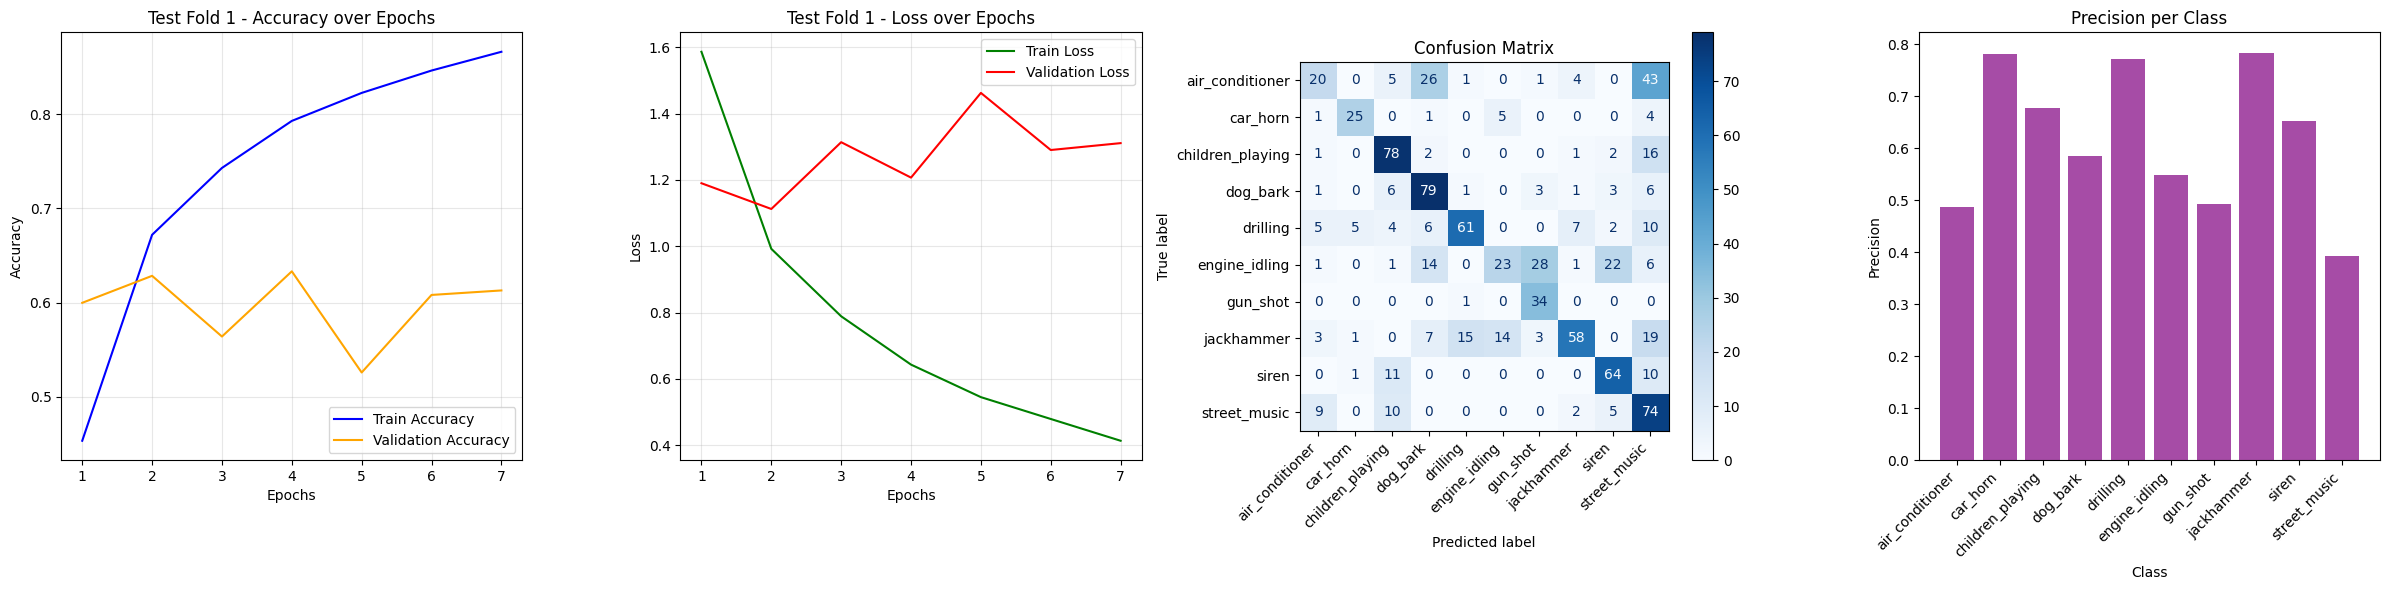

KeyboardInterrupt: 

In [84]:
cross_validate_with_test_and_plot(files, best_config)